In [44]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [45]:
# create a state
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int

    sr : float
    bpb : float
    boundary_percent : float
    summary : str


In [ ]:
def calculate_strike_rate(state : BatsmanState) -> BatsmanState:
    sr = (state['runs']/state['balls'])*100
    state[sr] = sr

    # return state['sr']
    return {'sr': sr} # here expected output in dictionary, partial update

In [47]:
def calculate_balls_per_boundary(state: BatsmanState) -> BatsmanState:   # this is for how many balls the batsman hits the boundary
   cbpb =  state['balls']/state['fours'] + state['sixes']
   state['bpb'] = cbpb

   # return state['bpb']
   return {'bpb' : cbpb}



In [48]:
def calculate_boundary_percentage(state : BatsmanState) -> BatsmanState:
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    state[boundary_percent] = boundary_percent

    # return state['boundary_percent']

    return {'boundary_percent' : boundary_percent}





In [49]:
def summary(state : BatsmanState) -> BatsmanState:
    summary = f""" 
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
boundary_percent - {state['boundary_percent']} \n

"""
    state['summary'] = summary

    # return state['summary']
    return {'summary' : summary}

In [50]:
# create a graph
graph = StateGraph(BatsmanState)

# add nodes
graph.add_node('calculate_strike_rate',calculate_strike_rate)
graph.add_node('calculate_balls_per_boundary',calculate_balls_per_boundary)
graph.add_node('calculate_boundary_percentage',calculate_boundary_percentage)
graph.add_node('summary',summary)

# add edges
graph.add_edge(START,'calculate_strike_rate')
graph.add_edge(START,'calculate_balls_per_boundary')
graph.add_edge(START,'calculate_boundary_percentage')

graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_balls_per_boundary', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')

graph.add_edge('summary', END)


# compile
workflow = graph.compile()

# execute
intial_state = {
    'runs' : 100,
    'balls' : 50,
    'fours' : 6,
    'sixes' : 4
}

workflow.invoke(intial_state)



{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 12.333333333333334,
 'boundary_percent': 48.0,
 'summary': ' \nStrike Rate - 200.0 \n\nBalls per boundary - 12.333333333333334 \n\nboundary_percent - 48.0 \n\n\n'}

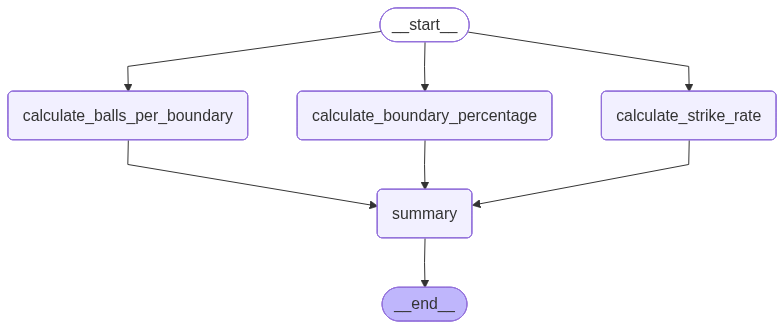

In [51]:
workflow